In [26]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [27]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [28]:
X_train1=train_df.drop('index',axis=1)
y_train=train_df['loan_status']

In [29]:
X_train2=X_train1.drop("loan_status",axis=1)

In [30]:
X_train=X_train2.drop("Unnamed: 0",axis=1)
X_train

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,n,29.99,0.0,0.0,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,n,11.26,2.0,0.0,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,n,11.28,0.0,0.0,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,n,18.08,0.0,0.0,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,n,27.77,0.0,2.0,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,801.09,RENT,28000.0,Not Verified,n,28.42,0.0,0.0,...,100.0,16.7,0.0,0.0,50055.0,28192.0,18700.0,19055.0,N,N
12176,15000.0,0.1774,540.34,RENT,50000.0,Verified,n,23.43,4.0,0.0,...,90.5,11.1,0.0,0.0,70324.0,57025.0,13300.0,54824.0,N,N
12177,3600.0,0.1862,131.28,RENT,60000.0,Not Verified,n,28.80,0.0,1.0,...,100.0,0.0,0.0,0.0,83765.0,55156.0,14800.0,53065.0,N,N
12178,15000.0,0.0881,475.68,MORTGAGE,62000.0,Source Verified,n,11.44,0.0,0.0,...,100.0,0.0,0.0,0.0,189930.0,23748.0,7000.0,32930.0,N,N


In [31]:
#investigating class balance
y_train.value_counts()

low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64

## The dataset is well balanced 

In [32]:
#dropping unnecessary columns
X_test2=test_df.drop('loan_status',axis=1)
y_test=test_df['loan_status']

In [33]:
X_test1=X_test2.drop('index',axis=1)

In [34]:
X_test=X_test1.drop("Unnamed: 0",axis=1)

In [35]:
X_test=test_df.drop('Unnamed: 0',axis=1)
X_test=test_df.drop('index',axis=1)

In [36]:
# Convert categorical data to numeric and separate target feature for training data
# One-hot encoding the entire dataframe
X_dummies_train = pd.get_dummies(X_train)
# Converting output labels to 0 and 1
y_label_train = LabelEncoder().fit_transform(y_train)


In [37]:
# Convert categorical data to numeric and separate target feature for testing data
X_dummies_test = pd.get_dummies(X_test)
y_label_test = LabelEncoder().fit_transform(y_test)


In [38]:
missing_cols = set( X_dummies_train.columns ) - set( X_dummies_test.columns )
missing_cols

{'debt_settlement_flag_Y'}

In [39]:
# add missing dummy variables to testing set
# Get missing columns in the training test
missing_cols = set( X_dummies_train.columns ) - set( X_dummies_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_dummies_test[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
X_dummies_test = X_dummies_test[X_dummies_train.columns]

In [19]:
# Train the Logistic Regression model on the unscaled data and print the model score
####################logistic Regression############
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

lr_model.fit(X_dummies_train,y_label_train)
train_score=lr_model.score(X_dummies_train,y_label_train)
test_score=lr_model.score(X_dummies_test,y_label_test)
print(train_score,test_score)

0.6508210180623973 0.5168013611229264


C:\Users\Saumy\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


k: 1, Train/Test Score: 0.499/1.000
k: 3, Train/Test Score: 0.509/0.802
k: 5, Train/Test Score: 0.508/0.754
k: 7, Train/Test Score: 0.505/0.721
k: 9, Train/Test Score: 0.508/0.705
k: 11, Train/Test Score: 0.508/0.693
k: 13, Train/Test Score: 0.504/0.683
k: 15, Train/Test Score: 0.508/0.678
k: 17, Train/Test Score: 0.508/0.665
k: 19, Train/Test Score: 0.507/0.668


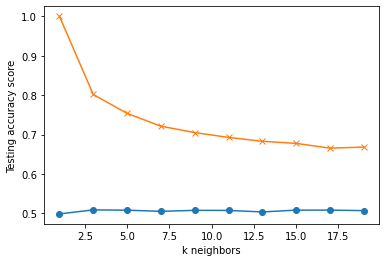

In [23]:
##################knnmodel#################################################
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_dummies_test,y_label_test)
    train_score = knn.score(X_dummies_train,y_label_train)
    test_score = knn.score(X_dummies_test,y_label_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()


In [24]:
#taking the k value as 11 and repridicting the score
knn_model=KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_dummies_train,y_label_train)
train_score=knn_model.score(X_dummies_train,y_label_train)
test_score=knn_model.score(X_dummies_test,y_label_test)
print(train_score,test_score)

0.6463054187192119 0.5110591237771162


seems Knearest model is overfit

In [16]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=42, n_estimators=30)
forest_model.fit(X_dummies_train,y_label_train)
print(f'Training Score: {forest_model.score(X_dummies_train,y_label_train)}')
print(f'Testing Score: {forest_model.score(X_dummies_test,y_label_test)}')


Training Score: 0.9994252873563219
Testing Score: 0.6371756699276904


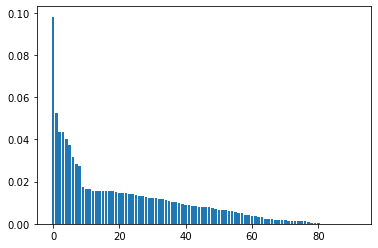

In [17]:

features = forest_model.feature_importances_
features = sorted(features, reverse=True)
features
# Note the "noisy" features
plt.bar(x = range(len(features)), height=features)
plt.show()

In [18]:
# Use SelectFromModel to only get the important features
from sklearn.feature_selection import SelectFromModel

# create selection object by passing in the model fitted above
# Note, the original model MUST be one that has a feature_importances_ or coef_
sel = SelectFromModel(forest_model)

In [19]:
# Fit selection object to the training set
sel.fit(X_dummies_train, y_label_train)

# Displays an array indicating whether given feature is important
sel.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [20]:
X_dummies_train.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

In [21]:
###remodelling using new data
X_forest_train=sel.transform(X_dummies_train)
X_forest_test=sel.transform(X_dummies_test)
forest_model = RandomForestClassifier(random_state=42, n_estimators=40)
forest_model.fit(X_forest_train,y_label_train)
print(f'Training Score: {forest_model.score(X_forest_train,y_label_train)}')
print(f'Testing Score: {forest_model.score(X_forest_test,y_label_test)}')

Training Score: 0.9995894909688013
Testing Score: 0.5935772011909826


# Let's see how logistic regression does with the non-selected dataset
# the train/test scores are as follows 0.6485221674876848 0.5253083794130158

In [22]:
# Now let's see it with selected dataset
clf = LogisticRegression()
clf.fit(X_forest_train,y_label_train)
print(f'Training Score: {clf.score(X_forest_train,y_label_train)}')
print(f'Testing Score: {clf.score(X_forest_test,y_label_test)}')

Training Score: 0.6490968801313629
Testing Score: 0.5180774138664398


C:\Users\Saumy\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## SCALED 

In [40]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_dummies_train)
X_train_scaled = scaler.transform(X_dummies_train)
X_test_scaled = scaler.transform(X_dummies_test)

In [24]:
# Train the Logistic Regression model on the scaled data and print the model score
####################logistic Regression############
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

lr_model.fit(X_train_scaled,y_label_train)
train_score=lr_model.score(X_train_scaled,y_label_train)
test_score=lr_model.score(X_test_scaled,y_label_test)
print(train_score,test_score)

0.7078817733990148 0.767333049766057


C:\Users\Saumy\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


k: 1, Train/Test Score: 1.000/0.527
k: 3, Train/Test Score: 0.792/0.534
k: 5, Train/Test Score: 0.741/0.536
k: 7, Train/Test Score: 0.716/0.536
k: 9, Train/Test Score: 0.703/0.544
k: 11, Train/Test Score: 0.691/0.551
k: 13, Train/Test Score: 0.682/0.551
k: 15, Train/Test Score: 0.677/0.559
k: 17, Train/Test Score: 0.677/0.552
k: 19, Train/Test Score: 0.672/0.554


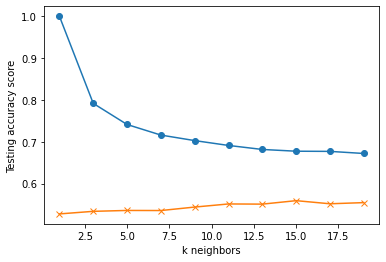

In [41]:
###################Also tried using knearest model#################################################
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_label_train)
    train_score = knn.score(X_train_scaled,y_label_train)
    test_score = knn.score(X_test_scaled,y_label_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [42]:
#taking the k value as 11 and repridicting the score
knn_model=KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X_train_scaled,y_label_train)
train_score=knn_model.score(X_train_scaled,y_label_train)
test_score=knn_model.score(X_test_scaled,y_label_test)
print(train_score,test_score)

0.683743842364532 0.5572096980008507


### Comparison of accuracy score of Logistic regression and Knnearest neighbor
LR:0.713136288998358 0.7201190982560612
KNN:
k=11 :train/test:0.7097701149425287 0.5125478519778818
K12  :train/test:0.708128078817734 0.5133985538068907
### Conclusion for our dataset Logistic Regression works better

In [45]:
# Train a Random Forest Classifier model on the scaled data and print the model score
from sklearn.ensemble import RandomForestClassifier
forest_modelscaled = RandomForestClassifier(random_state = 1,
                                  n_estimators = 750,
                                  max_depth = 15, 
                                  min_samples_split = 5,  min_samples_leaf = 1)
forest_modelscaled.fit(X_train_scaled,y_label_train)
print(f'Training Score: {forest_modelscaled.score(X_train_scaled,y_label_train)}')
print(f'Testing Score: {forest_modelscaled.score(X_test_scaled,y_label_test)}')


Training Score: 0.969047619047619
Testing Score: 0.6552530837941302


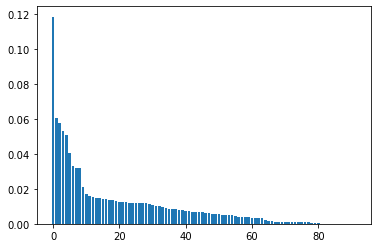

In [46]:
#getting the features and plotting
features = forest_modelscaled.feature_importances_
features = sorted(features, reverse=True)
features
# Note the "noisy" features
plt.bar(x = range(len(features)), height=features)
plt.show()

In [47]:
# Use SelectFromModel to only get the important features
from sklearn.feature_selection import SelectFromModel

# create selection object by passing in the model fitted above
# Note, the original model MUST be one that has a feature_importances_ or coef_
sel = SelectFromModel(forest_modelscaled)

In [48]:
# Fit selection object to the training set
sel.fit(X_train_scaled, y_label_train)

# Displays an array indicating whether given feature is important
sel.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [49]:
X_dummies_train.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

In [50]:
###remodelling using new data
X_forest_train=sel.transform(X_train_scaled)
X_forest_test=sel.transform(X_test_scaled)
forest_modelscaled = RandomForestClassifier(random_state=42, n_estimators=15)
forest_modelscaled.fit(X_forest_train,y_label_train)
print(f'Training Score: {forest_modelscaled.score(X_forest_train,y_label_train)}')
print(f'Testing Score: {forest_modelscaled.score(X_forest_test,y_label_test)}')

Training Score: 0.9945812807881773
Testing Score: 0.5765631646108039


In [51]:
# Now let's see it with selected dataset
clfscaled = LogisticRegression()
clfscaled.fit(X_forest_train,y_label_train)
print(f'Training Score: {clfscaled.score(X_forest_train,y_label_train)}')
print(f'Testing Score: {clfscaled.score(X_forest_test,y_label_test)}')

Training Score: 0.7076354679802955
Testing Score: 0.78285835814547


C:\Users\Saumy\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### comparison of scaled LR without random forest feature selection  and with random forest feature selection
#### without train/test:0.713136288998358 0.7201190982560612
#### with Train/test:0.7064860426929392:0.723521905572097
 

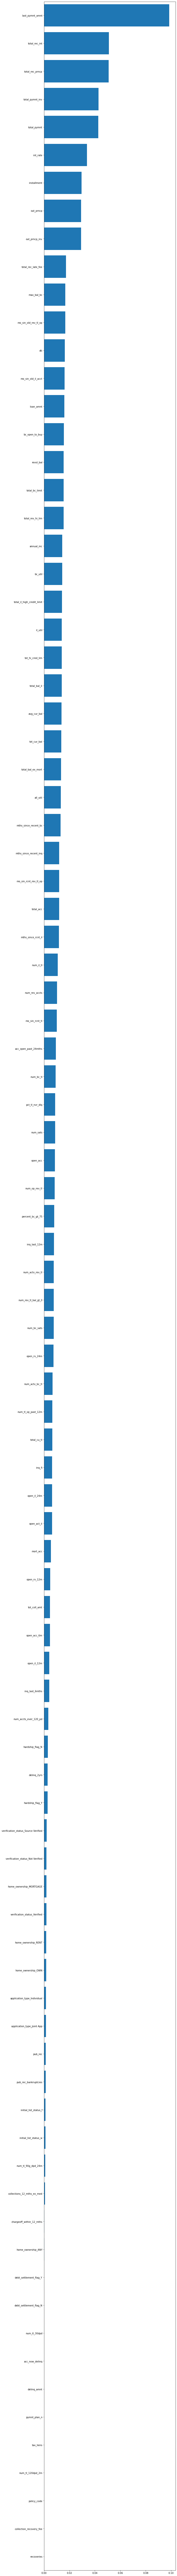

In [52]:
clf = RandomForestClassifier(random_state=1, n_estimators=200).fit(X_train_scaled, y_label_train)
feature_importances = clf.feature_importances_
features = sorted(zip( X_dummies_train.columns,clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()